# IRIS Flower-Classification

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
# supressing Warnings
filterwarnings(action='ignore')

#### Load the dataset

In [2]:
iris = pd.read_csv("Desktop/datasets/irisdataset.csv")

### Data Exploration

In [3]:
print("Shape of the Dataset:")
print(iris.shape)

print("\nDescriptive Statistics:")
print(iris.describe())

print("\nChecking for Null Values:")
print(iris.isna().sum())

print("\nData Sample:")
print(iris.head())

Shape of the Dataset:
(150, 6)

Descriptive Statistics:
       Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000

Checking for Null Values:
Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

Data Sample:
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4    

### Data Visualisation 

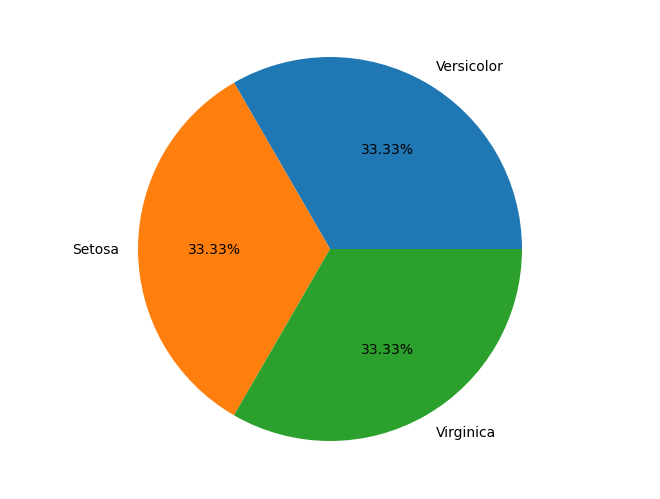

In [4]:
n = len(iris[iris['Species'] == 'versicolor'])
n1 = len(iris[iris['Species'] == 'virginica'])
n2 = len(iris[iris['Species'] == 'setosa'])
labels = ['Versicolor', 'Setosa', 'Virginica']
sizes = [n, n1, n2]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
ax.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()

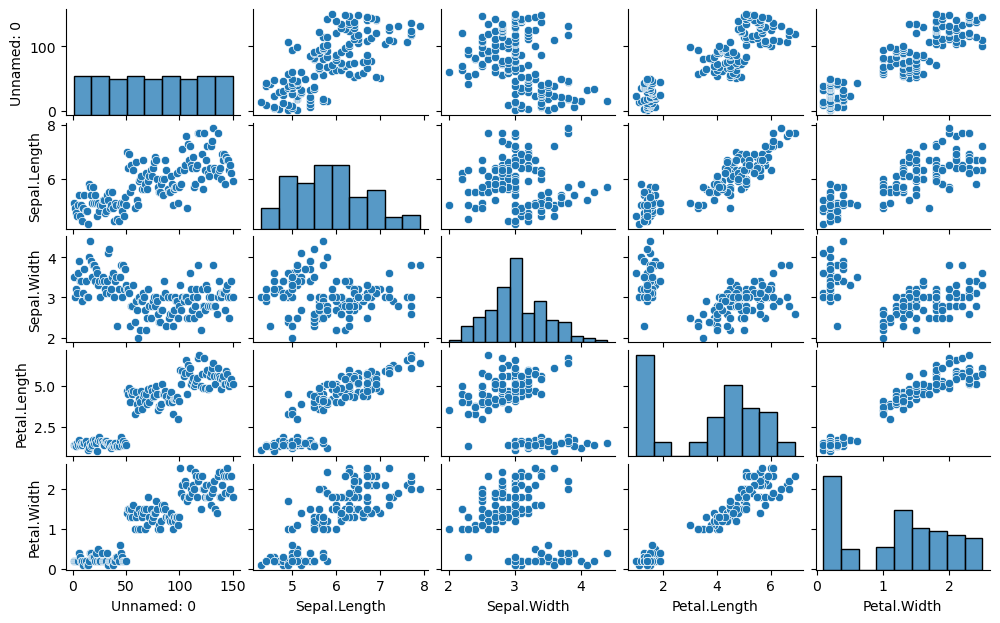

In [5]:
fig1=sns.pairplot(iris)
fig1.fig.set_figheight(6)
fig1.fig.set_figwidth(10)
plt.show()

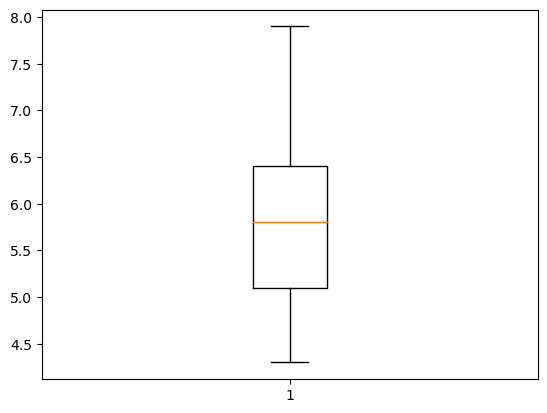

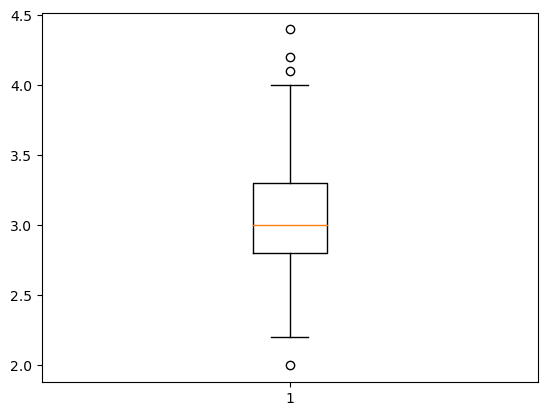

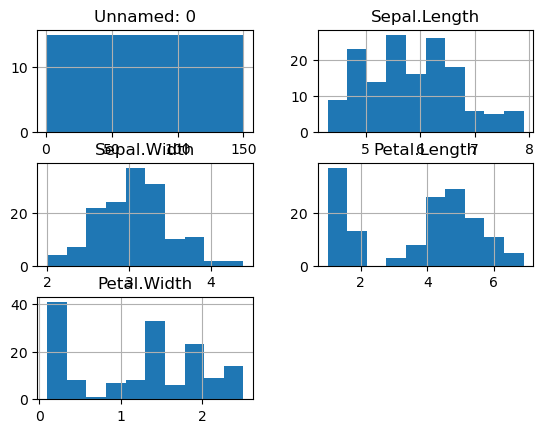

In [6]:
plt.figure(1)
plt.boxplot([iris['Sepal.Length']])
plt.figure(2)
plt.boxplot([iris['Sepal.Width']])
plt.show()

iris.hist()
plt.show()

### Data Preparation

In [7]:
X = iris['Sepal.Length'].values.reshape(-1, 1)
Y = iris['Sepal.Width'].values.reshape(-1, 1)

In [8]:
# Splitting the Data
from sklearn.model_selection import train_test_split

train, test = train_test_split(iris, test_size=0.25)
train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
test_y = test.Species

### Model Training and Evaluation

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

#### Logistic Regression and confusion matrix

In [10]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('Accuracy (Logistic Regression):', accuracy_score(prediction, test_y))
print("Confusion matrix (Logistic Regression):")
print(confusion_matrix(test_y, prediction))
print("Classification report (Logistic Regression):")
print(classification_report(test_y, prediction))

Accuracy (Logistic Regression): 0.9736842105263158
Confusion matrix (Logistic Regression):
[[ 8  0  0]
 [ 0 15  1]
 [ 0  0 14]]
Classification report (Logistic Regression):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.94      0.97        16
   virginica       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [11]:
model1 = SVC()
model1.fit(train_X, train_y)
pred_y = model1.predict(test_X)

print("Accuracy (Support Vector Machines):", accuracy_score(test_y, pred_y))

Accuracy (Support Vector Machines): 1.0
